In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os.path
import acquire
import prepare

from datetime import timedelta as td, datetime 
from math import sqrt
from scipy import stats

from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = prepare.get_data()

In [3]:
df = df.dropna(subset=['root_cause'])
df = df.dropna(subset=['age'])

In [4]:
(df.age.isna()).sum()

0

In [5]:
(df.root_cause.isna()).sum()

0

In [6]:
(df.age_binned.isna()).sum()

33

### Train Test Split
- train will be 80%

In [7]:
train, test = train_test_split(df, train_size=.8, random_state=123)

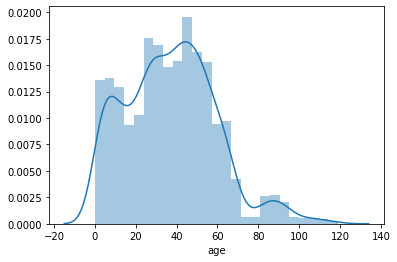

In [8]:
# distribution of age
sns.distplot(train.age)

In [9]:
(df.age < 0).sum()

0

In [10]:
df.age.isna().sum()

0

In [11]:
df.root_cause.value_counts()

structural           1085
grease                596
debris                438
rain event            384
contractor            147
lift station          128
vandalism              69
other                  57
roots                  22
i/i                    11
by pass pump leak       1
Name: root_cause, dtype: int64

In [12]:
(df.root_cause.isna()).sum()

0

In [13]:
df.shape

(2938, 76)

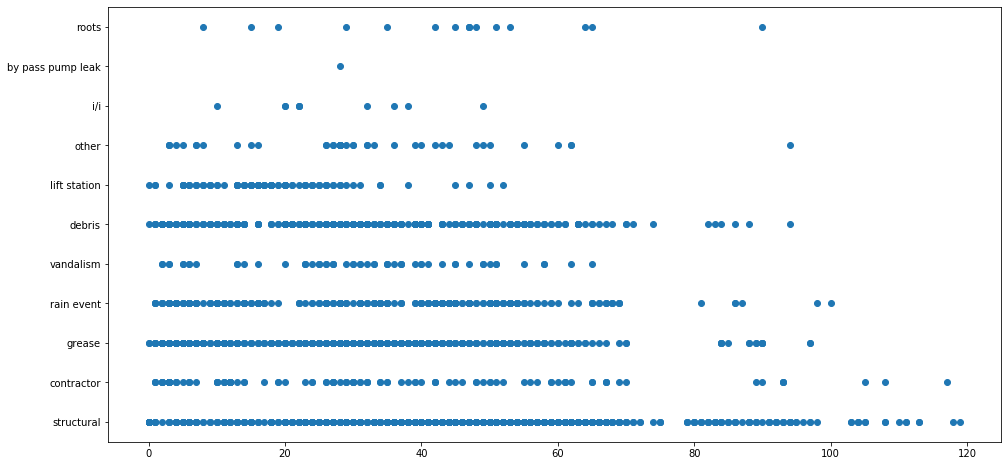

In [14]:
plt.figure(figsize=(16,8))
x = 'age'
y = 'root_cause'

plt.scatter(y=y, x=x, data=train)
plt.show()

In [15]:
df.age.describe()

count    2938.000000
mean       36.880871
std        22.172478
min         0.000000
25%        20.000000
50%        37.000000
75%        51.000000
max       119.000000
Name: age, dtype: float64

## Are age of sewer and root cause related?
- $H_0$: The age of the sewer and the root cause are not related.
- $H_a$: The age of the sewer and the root cause are related.

### Roots Causes Hypothesis:
- $H_0$: The age of the sewer is not correlated with the cause of the pipe damage involving structural
- $H_a$: The age of the sewer is correlated with the cause of the pipe damage involving structural    

In [31]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'structural'].age
overall_age = train.age.mean()

t, p = stats.ttest_1samp(i, overall_age)

if p < alpha:
    print(f"We fail to reject the null hypothesis P-value: {p}")
else:
    print(f"We reject the null hypothesis. P-value: {p}")

We fail to reject the null hypothesis P-value: 1.4625778475223794e-32


### Gease
- $H_0$: The age of the sewer is not correlated with the cause of the pipe damage involving grease
- $H_a$: The age of the sewer is correlated with the cause of the pipe damage involving grease

In [32]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'grease'].age
overall_age = train.age.mean()

t, p = stats.ttest_1samp(i, overall_age)

if p < alpha:
    print(f"We fail to reject the null hypothesis P-value: {p}")
else:
    print(f"We reject the null hypothesis. P-value: {p}")

We fail to reject the null hypothesis P-value: 3.933668352632381e-08


### i/i
- $H_0$: The age of the sewer is not correlated with the cause of the pipe damage involving i/i
- $H_a$: The age of the sewer is correlated with the cause of the pipe damage involving i/i

In [33]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'i/i'].age
overall_age = train.age.mean()

t, p = stats.ttest_1samp(i, overall_age)

if p < alpha:
    print(f"We fail to reject the null hypothesis P-value: {p}")
else:
    print(f"We reject the null hypothesis. P-value: {p}")

We reject the null hypothesis. P-value: 0.021864500832907866


### Roots
- $H_0$: The age of the sewer is not correlated with the cause of the pipe damage involving roots
- $H_a$: The age of the sewer is correlated with the cause of the pipe damage involving roots

In [34]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'roots'].age
overall_age = train.age.mean()

t, p = stats.ttest_1samp(i, overall_age)

if p < alpha:
    print(f"We fail to reject the null hypothesis P-value: {p}")
else:
    print(f"We reject the null hypothesis. P-value: {p}")

We reject the null hypothesis. P-value: 0.19029873273958248


### Debris
- $H_0$: The age of the sewer is not correlated with the cause of the pipe damage involving debris
- $H_a$: The age of the sewer is correlated with the cause of the pipe damage involving debris

In [35]:
# confidence level = 99%
alpha = 1 - .99
i = train[train.root_cause == 'debris'].age
overall_age = train.age.mean()

t, p = stats.ttest_1samp(i, overall_age)

if p < alpha:
    print(f"We fail to reject the null hypothesis P-value: {p}")
else:
    print(f"We reject the null hypothesis. P-value: {p}")

We fail to reject the null hypothesis P-value: 3.0945924771616208e-06


### there appears to be a correlation between i/i, roots, and debris with age of the sewer

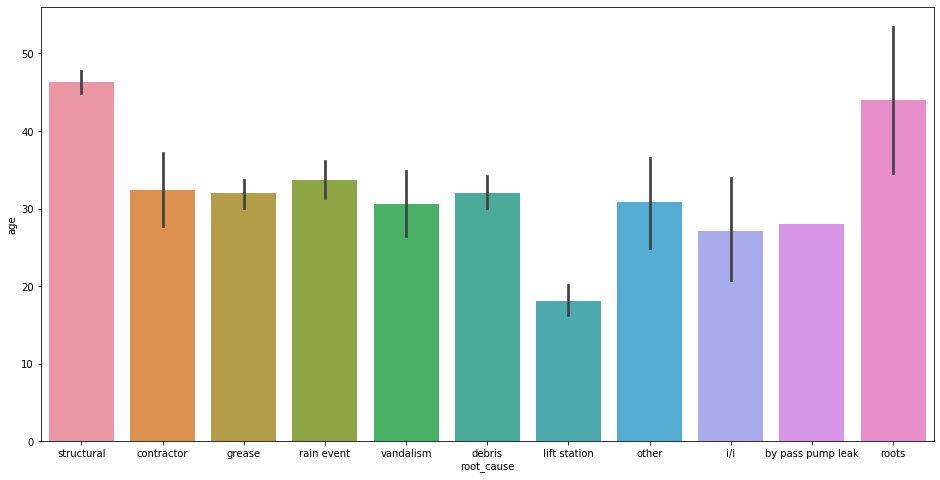

In [21]:
plt.figure(figsize=(16,8))
sns.barplot(x='root_cause', y="age", data=train)

### Roots and I/I
- $H_0$: Roots is not correlated with the cause of the pipe damage involving i/i
- $H_a$: Roots is correlated with the cause of the pipe damage involving i/i

In [28]:
# confidence level = 99%
alpha = 1 - .99
i = train[(train.root_cause == 'roots')].age
j = train[(train.root_cause == 'i/i')].age
overall_age = train.age.median()

t, p = stats.ttest_ind(i, j)

if p < alpha:
    print(f"We fail to reject the null hypothesis P-value: {p}")
else:
    print(f"We reject the null hypothesis. P-value: {p}")

We reject the null hypothesis. P-value: 0.024494507722686507


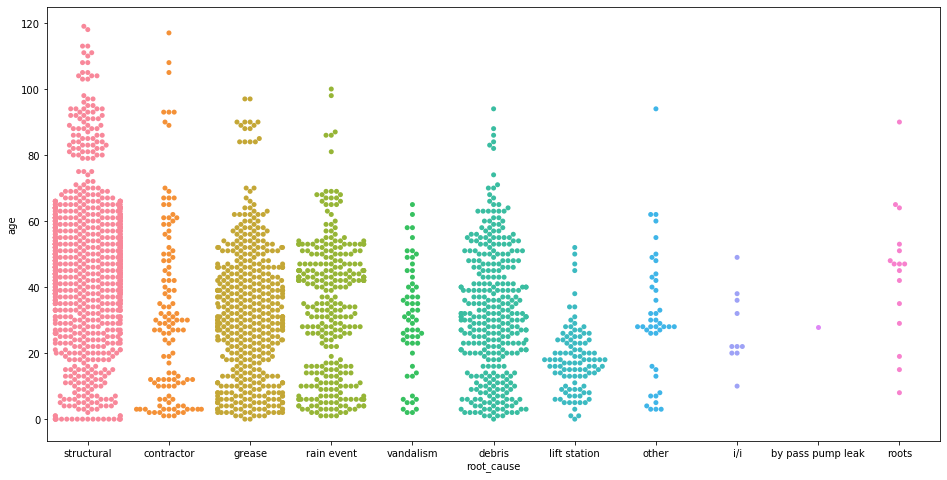

In [29]:
plt.figure(figsize=(16,8))
sns.swarmplot(x="root_cause", y="age", data=train)

In [30]:
train.root_cause.value_counts()

structural           888
grease               472
debris               335
rain event           308
contractor           118
lift station         101
vandalism             59
other                 42
roots                 16
i/i                   10
by pass pump leak      1
Name: root_cause, dtype: int64